# Importing files

In [1]:
import scipy.special as s
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 

# Variables and Parameters

In [2]:
bi      = 3                      #Biot Number
kappa   = 52                     #Thermal Conductivity(cast iron casing a motor generating heat): (W/(mK))
alp     = 1.7025e-5              #Thermal Diffusivity: (m2/s)

r_0     = 0.2                    #Max radius: (m)

q       = 7e4                    #Heat generated/vol: (W/m3)
Ti      = 30                     #Initial temp: (degree Celcius)
Tinf    = 25                     #Ambient temp: (degree Celcius)
delT    = Ti-Tinf

k_val   =  32                    #NUmber of bessel summation terms
step    = 0.0001                 #Radius steps

tmax    = 600                    #Maximum time in: (seconds)
tstep   = 10                    


# Bessel Fun zeroth & first order: (Jo,J1)

In [3]:
def J0(x2):
  bsf1=s.jv(0,x2)
  return(bsf1)

def J1(x3):
  bsf2=s.jv(1,x3)
  return(bsf2)

# Eigen Values for different Bi

In [4]:
#Lamda values can be solved for using the mth equation in the readme file using function f.solve for a given Biot number.

##Bi=1##lam = np.array([1.2557837117946,4.0794777108393,7.1557991746440,10.2709853620793,13.3983974864138,16.5311589326050,19.6667277887128,22.8039505186316,25.9422288398533,29.0812217718691,32.2207208280665,35.3605913932645,38.5007426824640,41.6411112516383,44.7816514290601,47.9223295014823,51.0631200414536,54.2040035097965,57.3449646447644,60.4859913524936,63.6270739257397,66.7682044829213,69.9093765582564,73.0505847975588,76.1918247292276,79.3330925896073,82.4743851882334,85.6156998027256,88.7570340959897,91.8983860503923,95.0397539149845,98.1811361628517,101.3225314563960])/r_0

##Bi=3##
lam=np.array([1.7886571741034556,4.463371687062525,7.4102697979339265,10.456598813134065,13.543437687744268,16.64985349628233,19.76705067826938,22.890769808457094,26.018720007267877,29.149565359078395,32.282476442581064,35.4169119388982,38.55250391155869,41.68899371534701,44.8261943125047,47.96396714328303, 51.10220740390041, 54.24083572371715, 57.37978487437271, 60.51900923024971, 63.65846576441509, 66.79812391906279, 69.9379538599341, 73.0779357679667, 76.2180501858754, 79.35828141633321, 82.49861655165894, 85.63904303340324, 88.77955228353834, 91.92013548861861, 95.06078532695017, 98.2014954147345, 104.48307463211063])/r_0


##Bi=9##lam =np.array([-35.58090661205443, -4.989702929078122, 2.1566066121933813, 4.9897029300394, 7.905056881017777, 10.884181645933715, 13.909031412603078, 16.965035283739006, 20.042197057682266, 23.13399114079144, 26.23616268384973, 29.34588824710337, 32.46124870328023, 35.58090658903461, 38.703907193201005, 41.829553768393104, 44.95732749639535, 48.08683498151535, 51.217773019480305, 54.34990441005031, 57.48304118739001, 60.61703252105408, 63.75175608456559, 66.88711166918512, 70.0230164357018, 73.1594013402616, 76.29620834660287, 79.43338841419276, 82.5708997489792, 85.70870655543673, 88.84677799601506, 91.98508736123622, 95.1236114103184, 98.26232982154872])/r_0


print(lam.size)

33


In [5]:
a=np.zeros(k_val+1)

for i in range(0,k_val+1,1):
    
  a[i]= (2*lam[i]*r_0)*(delT)*  (  ((bi**2+(lam[i]*r_0)**2)*(J0(lam[i]*r_0))**2)**(-1)   )  * ( (1-(q*r_0**2)*( (0.5/bi)+(1/(lam[i]*r_0))**2 )*(kappa*delT)**(-1)) *(J1(lam[i]*r_0))   +    ( ( q*r_0**2*J0(lam[i]*r_0) )*( kappa*(delT)*lam[i]*r_0)**(-1) ))


print(len(a))

33


# UnsteadySolution Function: (unSol)

In [6]:
def unSol(r,t):
  asum1=0
  asum=0
  for k in range(0,k_val+1,1):
    asum1= a[k] * (  math.exp(-(lam[k])**2   *alp*t)  )  *  J0( lam[k] * r )
    asum=asum+asum1
  return(asum)


In [7]:
radius=np.linspace(0,r_0,int(r_0/step)+1)
print(radius.size)

2001


# Computing for all time

In [8]:

theta=np.ones((int(r_0/step)+1,int(tmax/tstep)+1))
t5=0
t1=0
r1=0
while(t5<=tmax):
  r=0
  r1=0
  while(r<=r_0):
    theta[r1,t1]= q*r_0**2*(4*kappa*delT)**(-1)*( 1-(r/r_0)**2+(2/bi) )  +  unSol(r,t5)*(delT**(-1))
    r=r+step
    r1=r1+1
  theta[:,0]=1
  t5=t5+tstep
  t1=t1+1

print(r1,t1)
#print(theta3)

2001 61


In [9]:
time=np.linspace(0,tmax,int(tmax/tstep)+1)
print(time.shape)

(61,)


In [10]:
fordata=pd.DataFrame(theta,columns=time)
print(fordata)

      0.0       10.0      20.0      30.0      40.0      50.0      60.0   \
0       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
1       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
2       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
3       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
4       1.0  2.840708  2.886545  2.932381  2.978218  3.024050  3.069851   
...     ...       ...       ...       ...       ...       ...       ...   
1996    1.0  2.310231  2.161081  2.065115  1.995186  1.941072  1.897666   
1997    1.0  2.306830  2.157886  2.062056  1.992228  1.938192  1.894849   
1998    1.0  2.303417  2.154683  2.058992  1.989265  1.935308  1.892028   
1999    1.0  2.299991  2.151473  2.055921  1.986297  1.932420  1.889204   
2000    1.0  2.296552  2.148254  2.052845  1.983324  1.929528  1.886376   

         70.0      80.0      90.0   ...     510.0     520.0     530.0  \
0     3.115545  3.160984  

BIOT NUMBER: 3


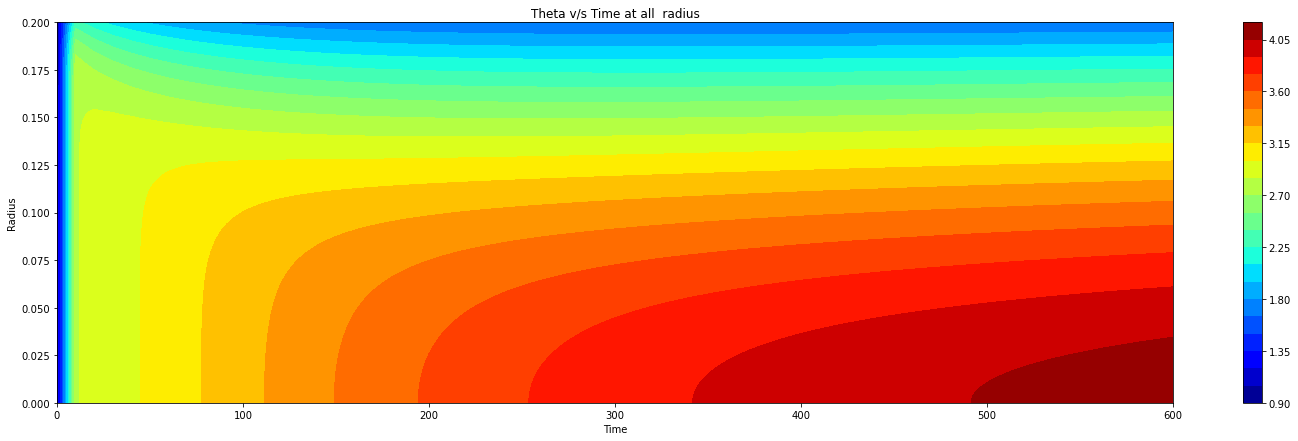

In [11]:
#@title Theta(r) v/s Time

plt.figure(figsize=(25,7))
plt.contourf(time, radius, theta , 20, cmap='jet')
# plt.contourf(theta,cmap='jet')
plt.title("Theta v/s Time at all  radius")
#plt.xlabel("Time:300s/30")
#plt.ylabel("Radius:10/0.01")
plt.ylabel("Radius")
plt.xlabel("Time")
# plt.ylim(0,101)
plt.xlim(0,600)
print("BIOT NUMBER:", bi)
plt.colorbar()
plt.show()

BIOT NUMBER: 3


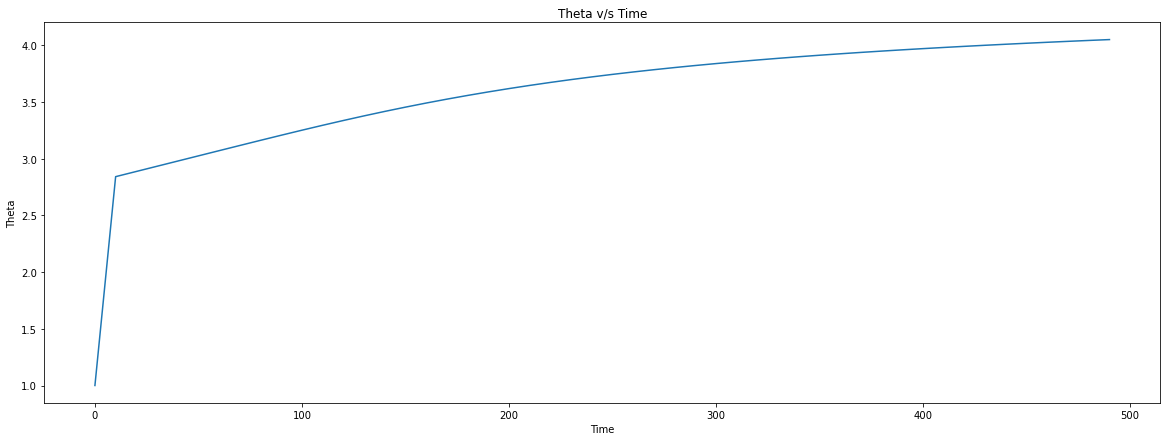

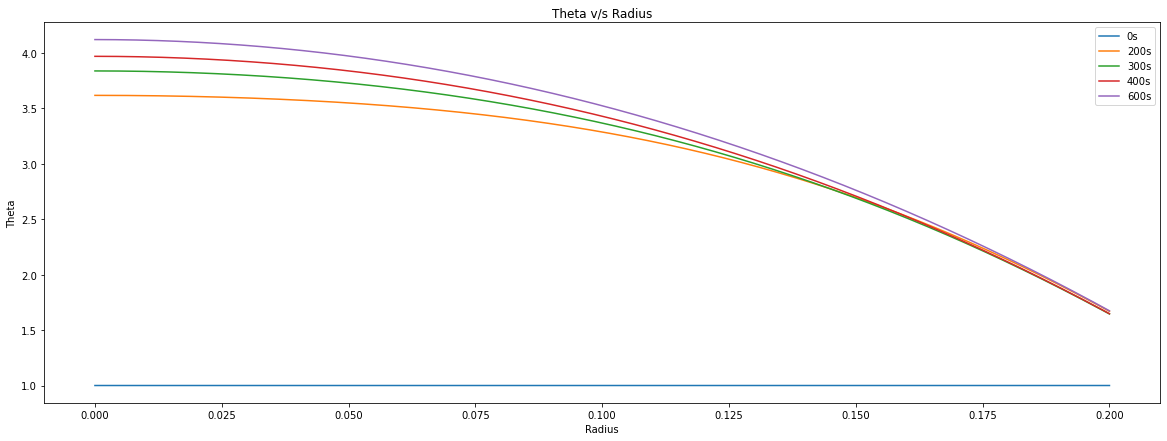

In [12]:
plt.figure(figsize=(20,7))
plt.title("Theta v/s Time")
plt.plot(time[:50],theta[0,:50])
#plt.xlim(0,12)
plt.xlabel("Time")
plt.ylabel("Theta")
print("BIOT NUMBER:", bi)


plt.figure(figsize=(20,7))
plt.title("Theta v/s Radius")
plt.plot(radius,theta[:,0],label='0s')
plt.plot(radius,theta[:,20],label='200s')
plt.plot(radius,theta[:,30],label='300s')
plt.plot(radius,theta[:,40],label='400s')
plt.plot(radius,theta[:,60],label='600s')
plt.xlabel("Radius")
plt.ylabel("Theta")
plt.legend()